In [1]:
import pandas as pd
import numpy as np

In [20]:
# read C:\Users\pablo\OneDrive\Desktop\tree_traits\data\Maynard_et_al_Tree_species_trait_table_with_monos.csvdf = pd.read_csv('C:\\Users\\pablo\\OneDrive\\Desktop\\tree_traits\\data\\Maynard_et_al_Tree_species_trait_table_with_monos.csv')
df = pd.read_csv('C:\\Users\\pablo\\OneDrive\\Desktop\\tree_clustering\\data\\traits_obs_log_imputed.csv',
                 index_col=0)

In [21]:
# pivot
# df = df.pivot(index='accepted_bin', columns='TraitID', values='value')
# reset column index

In [22]:
# fit Variatonal Gaussian Mixture
from sklearn.mixture import BayesianGaussianMixture

# fit model
model = BayesianGaussianMixture(n_components=300, covariance_type='full', 
                                max_iter=1000, n_init=1, random_state=0)
model.fit(df)

# see how many clusters
print(model.n_components)

300


In [23]:
model.n_features_in_

13

1.0

(array([16., 10., 10., 18., 18., 15., 14., 10., 22., 19., 11., 11.,  3.,
         3.,  6.,  6.,  2.,  5.,  5.,  0.,  4.,  0.,  4.,  3.,  3.,  1.,
         2.,  1.,  3.,  3.,  3.,  2.,  3.,  4.,  3.,  1.,  2.,  2.,  4.,
         1.,  3.,  1.,  1.,  1.,  2.,  4.,  2.,  2.,  2.,  4.,  1.,  1.,
         0.,  3.,  1.,  2.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  2.,  1.,
         0.,  0.,  0.,  1.,  1.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  1.,  1.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  1.80980294,   3.9372823 ,   6.06476166,   8.19224102,
         10.31972038,  12.44719974,  14.57467909,  16.70215845,
         18.82963781,  20.95711717,  23.08459653,  25.21207589,
         27.33955525,  29.46703461,  31.59451397,  33.72199333,
         35.84947269,  37.97695204,  40.1044314 ,  42.23191076,
         44.35939012,  46.48686948,  48.61434884,  50.7418282 ,
         52.86930756,  54.99678692,  57.12426628, 

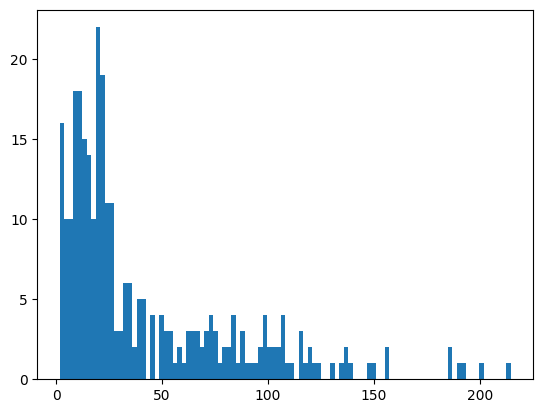

In [28]:
# plot weights histogram
import matplotlib.pyplot as plt
plt.hist(model.weights_*len(df), bins=100)

In [11]:
# fit a Gaussian Mixture Model
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5)
gmm.fit(df)


GaussianMixture(n_components=5)

In [14]:
# fit HDBSCAN
from sklearn.cluster import HDBSCAN

hdbscan = HDBSCAN(min_cluster_size=10)
hdbscan.fit(df)


HDBSCAN(min_cluster_size=10)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

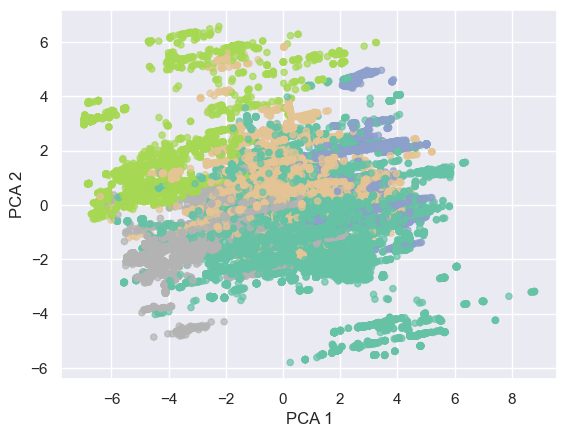

In [19]:
# get a PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df)
pca_df = pca.transform(df)

# visualize the clusters

sns.set()
plt.scatter(pca_df[:, 0], pca_df[:, 1], c=gmm.predict(df), cmap = 'Set2',
            s=20, alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

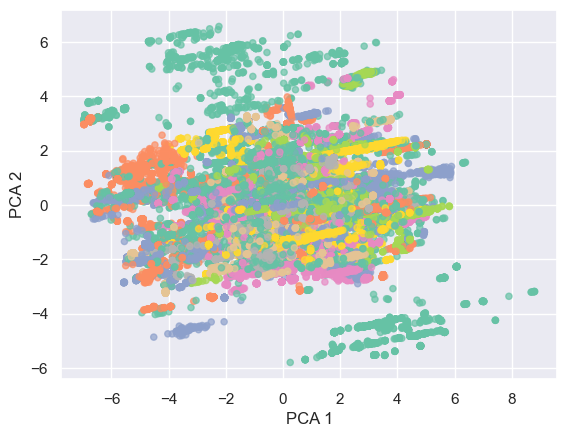

In [18]:
# get a PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df)
pca_df = pca.transform(df)

# visualize the clusters

sns.set()
plt.scatter(pca_df[:, 0], pca_df[:, 1], c=hdbscan.labels_, cmap = 'Set2',
            s=20, alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()